# Final results of Chapter 1
## The universal dict of dfs was proposed. Each df of dict filtered in its own boundaries
##  Each df consist of all importants IDs to handle them in any direction
## At the end of file there is a thermal power prediction. Due to there are no significant cyclic dependencies for thermal power prediction it can be predicted based on dt and wfr parameters

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

In [3]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-10-17","2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
    ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
    ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23"), ("2023-01-10","2023-01-13"), 
    ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"), ("2023-01-31","2023-02-03"), 
    ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), ("2023-02-28","2023-03-03"), 
    ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), ("2023-03-14","2023-03-17"),
    ("2023-03-21","2023-03-24"),
    ("2023-03-27","2023-03-31"), ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14")
]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [4]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [31]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates

In [32]:
# key ids 317, 319, 325, 460, 461, 462, 463, 327
df_refacP1 = CsvRefactorer.read_csv("P1_second_circuit_data_171022_to_140423.csv")
df_refacP2 = CsvRefactorer.read_csv("P2_second_circuit_data_171022_to_140423.csv")

In [33]:
ids1 = df_refacP1.df["ID"].unique()
ids2 = df_refacP2.df["ID"].unique()

In [34]:
ids1_array = df_refacP1.select_by_ids(ids1)
ids2_array = df_refacP2.select_by_ids(ids2)

In [35]:
group1 = df_refacP1.min_frac_groupby(10, *ids1_array)
group2 = df_refacP2.min_frac_groupby(10, *ids2_array)

In [36]:
df1 = df_refacP1.concat_dfs(group1)
df2 = df_refacP2.concat_dfs(group2)

In [37]:
df = pd.concat([df1, df2], axis=1)

In [38]:
df.loc["2022-11-22":"2022-11-25"].describe()

,309,317,319,325,327,381,395,396,481,406,407,408,409,460,461,462,463
count,407.000000,449.000000,428.000000,438.000000,428.000000,171.000000,289.000000,218.000000,434.000000,441.000000,445.000000,472.000000,448.000000,472.000000,472.000000,472.000000,470.000000
mean,0.438371,22.223167,28.720109,28.280799,-18.503528,1.010724,42.091313,1.676615,689.478026,139.498252,133.676364,0.297393,131.396809,28.022737,29.677123,28.300296,27.595627
std,0.026038,2.735529,3.019185,3.054774,4.962238,0.984480,39.208850,1.258809,20.101627,17.843217,21.164543,0.025568,23.321815,3.135167,3.514750,3.187264,2.293371
min,0.010000,7.000000,8.555556,10.666667,-25.955263,0.002704,0.003241,0.001652,354.200000,0.039158,0.001903,0.207408,0.021397,9.788946,10.555607,10.048674,23.128407
25%,0.440000,21.100000,27.800000,27.397580,-22.478717,0.095315,1.502284,0.206459,685.737500,139.751554,134.748370,0.280837,133.816191,27.158465,28.991814,27.418669,26.285947
50%,0.440000,22.054546,28.600000,28.241572,-18.592402,0.617828,78.193726,1.965454,688.637500,141.806106,137.118732,0.296955,135.502345,28.146520,30.003589,28.456217,28.285292
75%,0.440000,23.454545,30.040038,29.576847,-17.104642,2.102342,80.000727,2.838692,691.762500,143.525837,138.854576,0.314289,136.740182,29.368726,31.118303,29.634111,29.428405
max,0.446000,27.065625,33.284848,32.954286,-7.000000,2.860664,86.674924,3.460265,809.275000,151.257467,144.239183,0.380752,139.619000,32.904612,34.731346,33.193762,30.316097


In [39]:
# quick TCF categorizing ( set 0 or 1)

df[381] = np.where(df[381] > 20, 0, 1)
df[395] = np.where(df[395] > 20, 0, 1)
df[396] = np.where(df[396] > 20, 0, 1)

In [40]:
periods = df_refacP1.select_time_period(
    df,
    time_periods
)

In [41]:
periods

{'2022-10-17 2022-10-21':                       309   317   319        325       327  381  395  396  \
 Timestamp                                                                   
 2022-10-17 09:20:00  0.01  16.5  21.4  20.100000  4.200000    1    1    1   
 2022-10-17 09:30:00  0.01  16.5  21.4  20.090909  4.308333    1    1    1   
 2022-10-17 09:40:00  0.01  16.5  21.4  20.068421  4.388572    1    1    1   
 2022-10-17 09:50:00  0.01  16.5  21.4  20.030769  4.600000    1    1    1   
 2022-10-17 10:00:00  0.01  16.5  21.4  20.014286  4.768571    1    1    1   
 ...                   ...   ...   ...        ...       ...  ...  ...  ...   
 2022-10-21 23:10:00  0.00   0.0   0.0   0.000000  0.000000    1    1    1   
 2022-10-21 23:20:00  0.00   0.0   0.0   0.000000  0.000000    1    1    1   
 2022-10-21 23:30:00  0.00   0.0   0.0   0.000000  0.000000    1    1    1   
 2022-10-21 23:40:00  0.00   0.0   0.0   0.000000  0.000000    1    1    1   
 2022-10-21 23:50:00  0.00   0.0   0.0 

In [42]:
wfr_anal = WaterFlowRates(0.1)

In [43]:
periods_ftrd = {}

for i in periods.keys():
    periods_ftrd[i], _ = wfr_anal.df_md_filter(periods[i], 481)

In [44]:
# quick NaN handling

for i in periods.keys():
    periods_ftrd[i] = periods_ftrd[i].fillna(0.0)
    zero_pressure = periods_ftrd[i][periods_ftrd[i][309] == 0.0].index
    zero_currents = periods_ftrd[i][
        (periods_ftrd[i][406] == 0.0) &
        (periods_ftrd[i][407] == 0.0) &
        (periods_ftrd[i][408] == 0.0) &
        (periods_ftrd[i][409] == 0.0)
    ].index
    # drop rows where pressure is nill
    periods_ftrd[i] = periods_ftrd[i].drop(index=zero_pressure)
    periods_ftrd[i] = periods_ftrd[i].drop(index=zero_currents)
    

In [45]:
periods_ftrd

{'2022-10-17 2022-10-21':                           309        317        319        325        327  \
 Timestamp                                                                   
 2022-10-17 14:10:00  0.190000  14.694286  18.942857  17.117143  10.690909   
 2022-10-17 15:10:00  0.450000  14.353125  16.441667  16.337838   9.247222   
 2022-10-17 15:20:00  0.450000  14.747059  17.215789  17.100000   9.481579   
 2022-10-17 15:30:00  0.450000  15.345946  18.567500  18.510000   9.726316   
 2022-10-17 15:40:00  0.450000  16.150000  20.095000  19.945000   9.594286   
 ...                       ...        ...        ...        ...        ...   
 2022-10-21 18:50:00  0.450000  20.987879  27.696970  27.300000   6.139394   
 2022-10-21 19:00:00  0.451538  20.538889  25.662500  25.040000   6.163636   
 2022-10-21 19:10:00  0.452941  19.794737  23.000000  22.575000   6.272973   
 2022-10-21 19:20:00  0.454400  18.673684  20.967500  20.625000   6.305128   
 2022-10-21 19:30:00  0.400333  17.5717

In [46]:
# TO get right Imean the following approach suggested
for i in periods.keys():
    
    try:
        periods_ftrd[i]["I2mean"] = periods_ftrd[i].loc[:, [406, 407, 408, 409]].sum(axis=1)/3
        
        # drop 406,407,408,409
        periods_ftrd[i] = periods_ftrd[i].drop([406, 407, 408, 409], axis=1)
    except KeyError:
        print("Some of cols have been dropped already")
    print(periods_ftrd[i])

                          309        317        319        325        327  \
Timestamp                                                                   
2022-10-17 14:10:00  0.190000  14.694286  18.942857  17.117143  10.690909   
2022-10-17 15:10:00  0.450000  14.353125  16.441667  16.337838   9.247222   
2022-10-17 15:20:00  0.450000  14.747059  17.215789  17.100000   9.481579   
2022-10-17 15:30:00  0.450000  15.345946  18.567500  18.510000   9.726316   
2022-10-17 15:40:00  0.450000  16.150000  20.095000  19.945000   9.594286   
...                       ...        ...        ...        ...        ...   
2022-10-21 18:50:00  0.450000  20.987879  27.696970  27.300000   6.139394   
2022-10-21 19:00:00  0.451538  20.538889  25.662500  25.040000   6.163636   
2022-10-21 19:10:00  0.452941  19.794737  23.000000  22.575000   6.272973   
2022-10-21 19:20:00  0.454400  18.673684  20.967500  20.625000   6.305128   
2022-10-21 19:30:00  0.400333  17.571795  19.028205  18.637500   6.263158   

In [47]:
# Noimalize Q by P and Imean
for i in periods.keys():
    
    try:
        # QbyIP units are m3/h/MPa/A
        periods_ftrd[i]["QbyIP"] = periods_ftrd[i][481]/(periods_ftrd[i][309]*periods_ftrd[i]["I2mean"])
        # drop 406,407,408,409
        periods_ftrd[i] = periods_ftrd[i].drop([481, 309, "I2mean"], axis=1)
    except KeyError:
        print("Some of cols have been dropped already")
    print(periods_ftrd[i])

                           317        319        325        327  381  395  \
Timestamp                                                                   
2022-10-17 14:10:00  14.694286  18.942857  17.117143  10.690909    1    1   
2022-10-17 15:10:00  14.353125  16.441667  16.337838   9.247222    1    1   
2022-10-17 15:20:00  14.747059  17.215789  17.100000   9.481579    1    1   
2022-10-17 15:30:00  15.345946  18.567500  18.510000   9.726316    1    1   
2022-10-17 15:40:00  16.150000  20.095000  19.945000   9.594286    1    1   
...                        ...        ...        ...        ...  ...  ...   
2022-10-21 18:50:00  20.987879  27.696970  27.300000   6.139394    0    0   
2022-10-21 19:00:00  20.538889  25.662500  25.040000   6.163636    0    0   
2022-10-21 19:10:00  19.794737  23.000000  22.575000   6.272973    0    0   
2022-10-21 19:20:00  18.673684  20.967500  20.625000   6.305128    0    0   
2022-10-21 19:30:00  17.571795  19.028205  18.637500   6.263158    0    0   

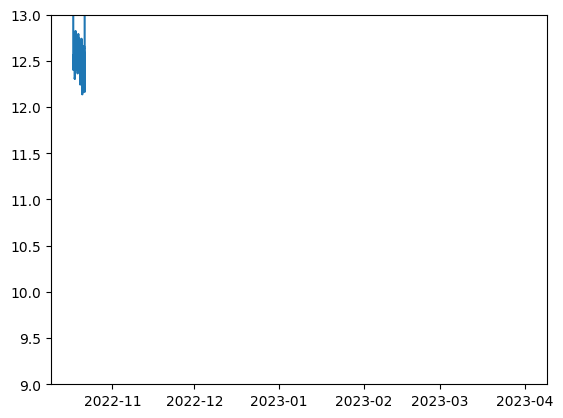

In [48]:
# quick view of df

for i in periods_ftrd.keys():
    plt.plot(periods_ftrd[i]["QbyIP"])
    plt.ylim(9,13)

In [49]:
# try to apply double filtering

for i in periods_ftrd.keys():
    periods_ftrd[i], _ = wfr_anal.df_md_filter(periods_ftrd[i], "QbyIP")

In [24]:
print(periods_ftrd)

{'2022-10-17 2022-10-21':                            317        319        325       327  381  395  396  \
Timestamp                                                                       
2022-10-17 15:10:00  14.353125  16.441667  16.337838  9.247222    1    1    1   
2022-10-17 15:20:00  14.747059  17.215789  17.100000  9.481579    1    1    1   
2022-10-17 15:30:00  15.345946  18.567500  18.510000  9.726316    1    1    1   
2022-10-17 15:40:00  16.150000  20.095000  19.945000  9.594286    1    1    1   
2022-10-17 15:50:00  17.255000  21.485000  21.322500  9.352778    1    1    1   
...                        ...        ...        ...       ...  ...  ...  ...   
2022-10-21 18:50:00  20.987879  27.696970  27.300000  6.139394    0    0    0   
2022-10-21 19:00:00  20.538889  25.662500  25.040000  6.163636    0    0    0   
2022-10-21 19:10:00  19.794737  23.000000  22.575000  6.272973    0    0    0   
2022-10-21 19:20:00  18.673684  20.967500  20.625000  6.305128    0    0    0   
20

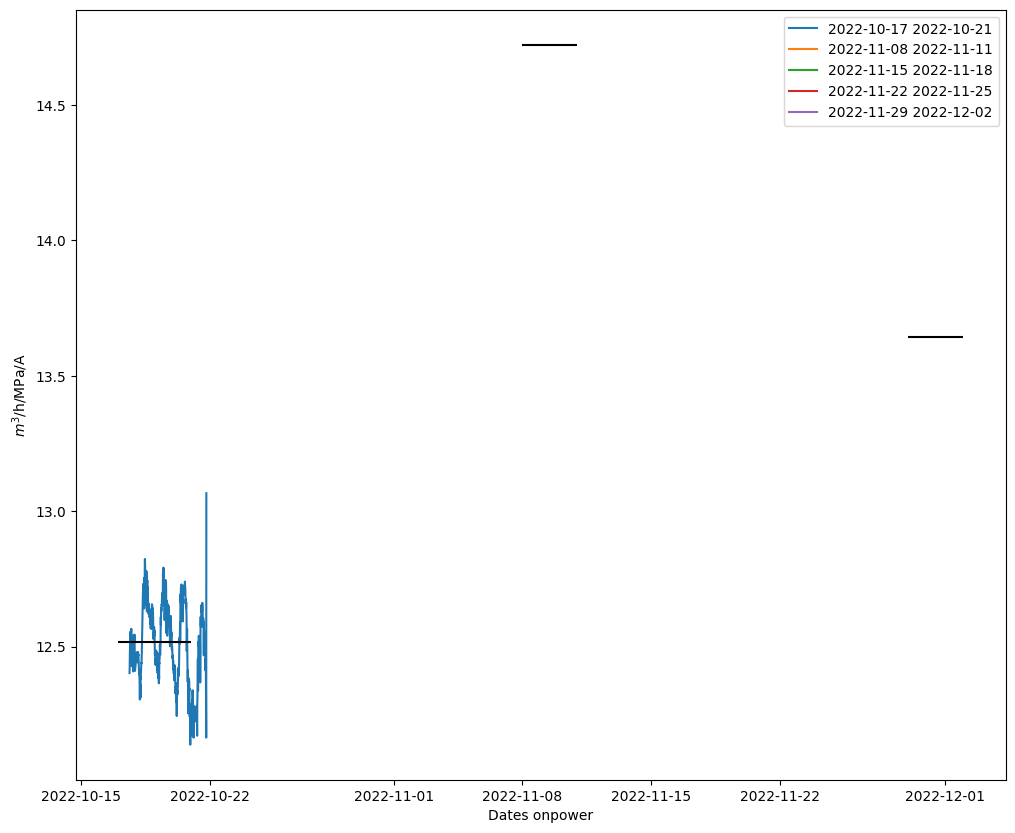

In [27]:
# new quick view of df
plt.figure(figsize = (12,10))

for n, i in enumerate(list(periods_ftrd.keys())[:5]):
    
    s,f = list(periods_ftrd.keys())[n].split(" ")
    plt.plot(periods_ftrd[i]["QbyIP"], label=i)
    q_mean = periods_ftrd[i]["QbyIP"].mean()
    plt.hlines(q_mean, pd.to_datetime(s), pd.to_datetime(f), color="black")
    plt.xlabel("Dates onpower")
    plt.ylabel("$m^3$/h/MPa/A")
    plt.legend()
#     plt.ylim(9,13)

In [28]:
# to make clear dataset extra data engineering steps are required
# 1 - temporary drop temperature on each HE
# 2 - get delta t on second circuit

# 1 step
t_on_HE = {}

for i in periods_ftrd.keys():
    
    try:
        t_on_HE[i] = periods_ftrd[i].loc[:, [325, 460, 461, 462, 463]]
        periods_ftrd[i] = periods_ftrd[i].drop([325, 460, 461, 462, 463], axis=1)
        
    except KeyError:
        print("Some of cols have been dropped already")




In [29]:
# 2 step

for i in periods_ftrd.keys():
    
    try:
        periods_ftrd[i]["dt2"] = periods_ftrd[i][319] - periods_ftrd[i][317]
        periods_ftrd[i] = periods_ftrd[i].drop([319, 317], axis=1)
        
    except KeyError:
        print("Some of cols have been dropped already")

In [30]:
periods_ftrd

{'2022-10-17 2022-10-21':                           327  381  395  396      QbyIP       dt2
 Timestamp                                                        
 2022-10-17 15:10:00  9.247222    1    1    1  12.402024  2.088542
 2022-10-17 15:20:00  9.481579    1    1    1  12.415593  2.468731
 2022-10-17 15:30:00  9.726316    1    1    1  12.469533  3.221554
 2022-10-17 15:40:00  9.594286    1    1    1  12.483268  3.945000
 2022-10-17 15:50:00  9.352778    1    1    1  12.508822  4.230000
 ...                       ...  ...  ...  ...        ...       ...
 2022-10-21 18:50:00  6.139394    0    0    0  12.441285  6.709091
 2022-10-21 19:00:00  6.163636    0    0    0  12.348984  5.123611
 2022-10-21 19:10:00  6.272973    0    0    0  12.266097  3.205263
 2022-10-21 19:20:00  6.305128    0    0    0  12.163646  2.293816
 2022-10-21 19:30:00  6.263158    0    0    0  13.066489  1.456410
 
 [581 rows x 6 columns],
 '2022-11-08 2022-11-11':                           327  381  395  396     Qb

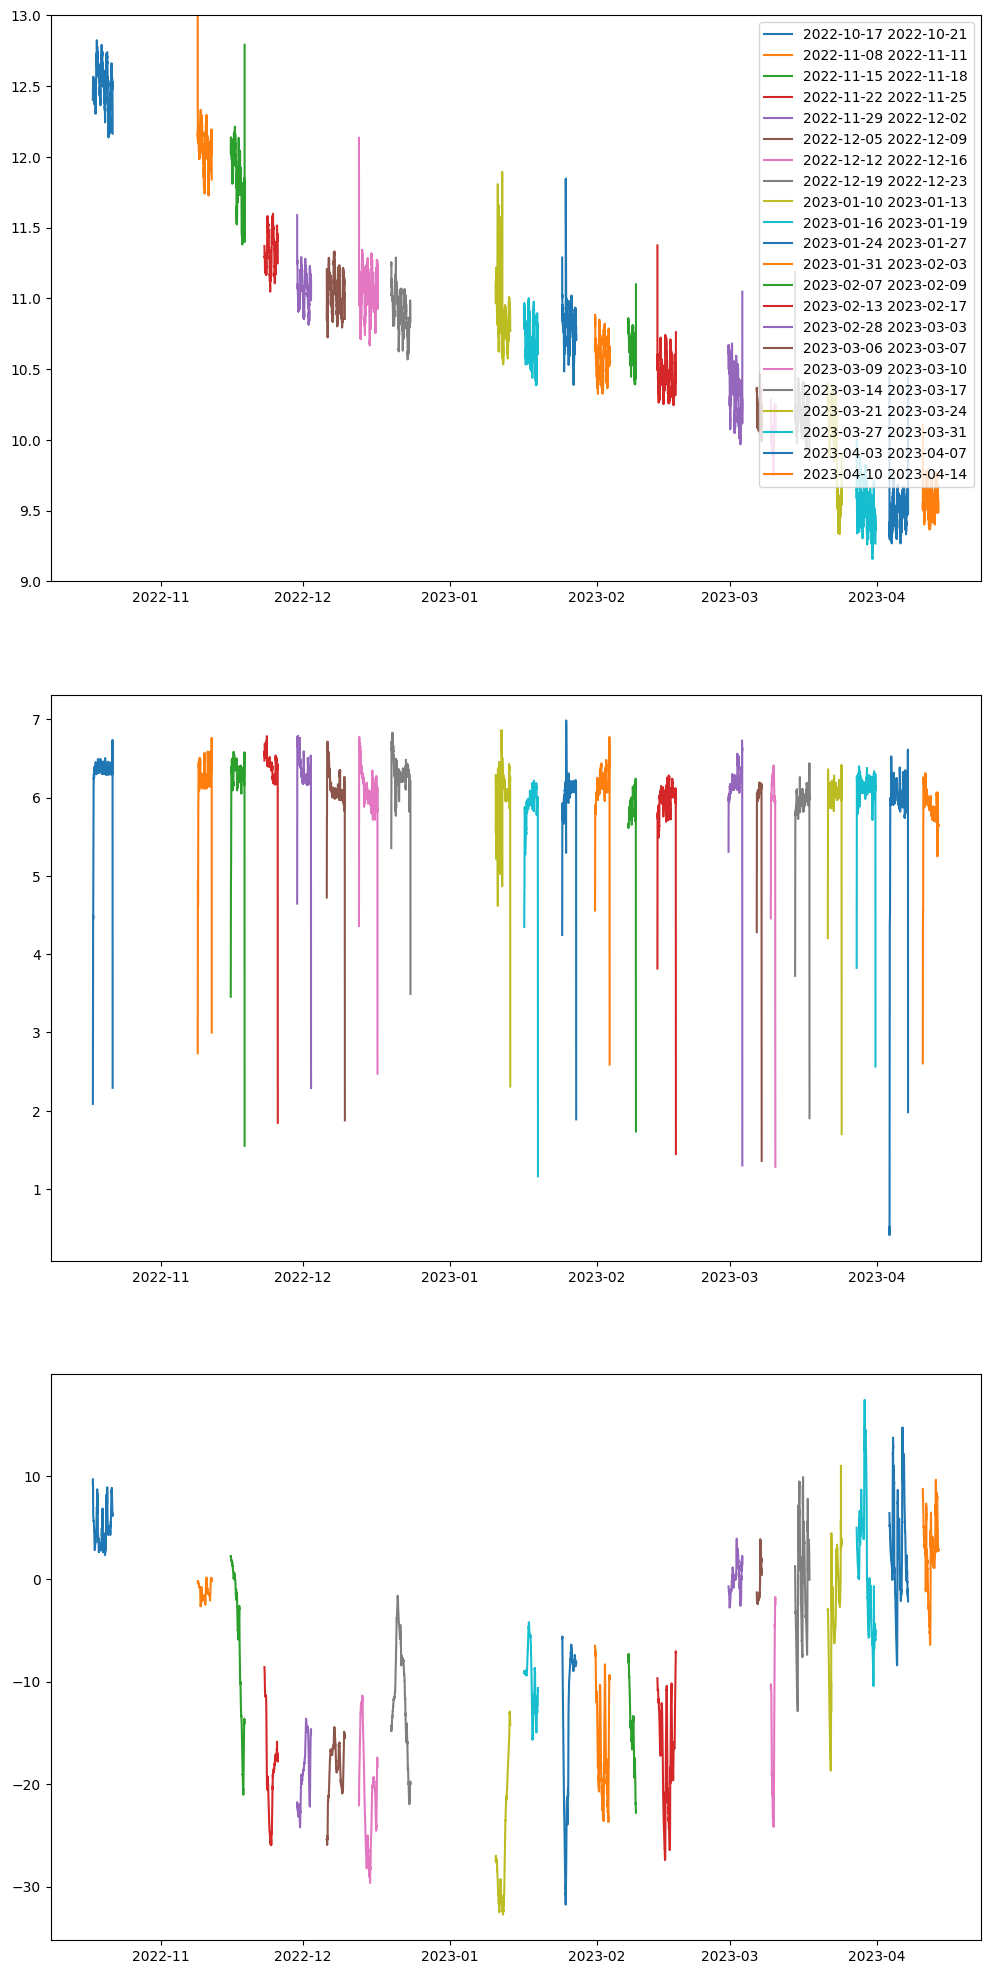

In [28]:
# new quick view of df
fig, axs = plt.subplots(3,1, figsize = (12,25))

for n, i in enumerate(periods_ftrd.keys()):
    
    
    axs[0].plot(periods_ftrd[i]["QbyIP"], label=i)
    axs[0].legend()
    axs[0].set_ylim(9,13)
    
    axs[1].plot(periods_ftrd[i]["dt2"])
    
    axs[2].plot(periods_ftrd[i][327])

In [29]:
# from figs above the follwoing can be concluded:
# - dt on HEs has high dispersion at the start and finish of weekly cycle, so better to filter dataframes 
# by this parameter
from analytics import WaterTemperatures
wt = WaterTemperatures(0.85)

for i in periods.keys():
    periods_ftrd[i], _ = wt.df_md_filter(periods_ftrd[i], "dt2")

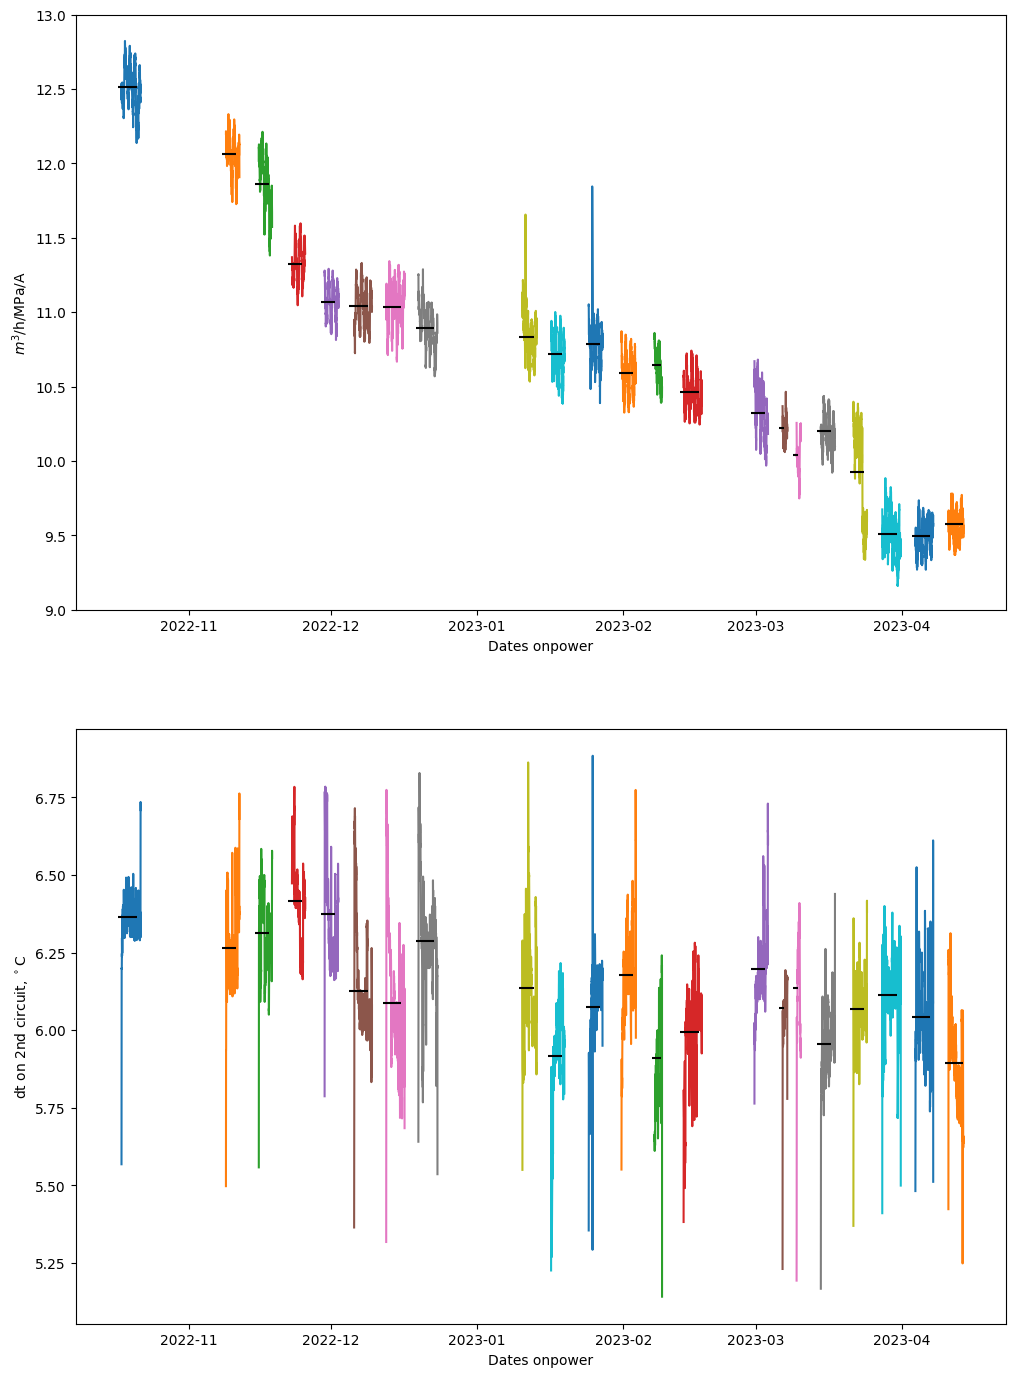

In [30]:
# new quick view of df
fig, axs = plt.subplots(2,1, figsize = (12,17))

for n, i in enumerate(periods_ftrd.keys()):
    s,f = list(periods_ftrd.keys())[n].split(" ")
    q_mean = periods_ftrd[i]["QbyIP"].mean()
    dt_mean = periods_ftrd[i]["dt2"].mean()
    
    
    axs[0].plot(periods_ftrd[i]["QbyIP"], label=i)
    axs[0].hlines(q_mean, pd.to_datetime(s), pd.to_datetime(f), color="black")
    axs[0].set_ylim(9,13)
    axs[0].set_xlabel("Dates onpower")
    axs[0].set_ylabel("$m^3$/h/MPa/A")
#     axs[0].legend()
    
    axs[1].plot(periods_ftrd[i]["dt2"])
    axs[1].hlines(dt_mean, pd.to_datetime(s), pd.to_datetime(f), color="black")
    axs[1].set_xlabel("Dates onpower")
    axs[1].set_ylabel("dt on 2nd circuit, $^\circ$C")
    
#     axs[2].plot(periods_ftrd[i][327])
    
#     axs[3].plot(periods_ftrd[i][381])
    

In [31]:
# interesting note
# The dt is almost the same for every week on power
# But if the Q decreasing due to flouring/ effeciency drop of HE
# How to sustain the same dt? Probably by frequent enabling of CTF???
# just lets count how many time CTF were enabled for each week

for n, i in enumerate(periods_ftrd.keys()):
    print(periods_ftrd[i].loc[:, [381, 395, 396]].value_counts())


381  395  396
0    0    1      580
          0        4
dtype: int64
381  395  396
1    0    1      284
0    0    1      123
          0        5
dtype: int64
381  395  396
1    0    1      166
0    0    1      144
1    1    1       96
dtype: int64
381  395  396
1    1    1      259
     0    1      143
dtype: int64
381  395  396
1    1    1      273
     0    1      116
0    1    0        9
     0    0        1
dtype: int64
381  395  396
1    1    1      508
     0    1       38
dtype: int64
381  395  396
1    1    1      327
     0    1      234
dtype: int64
381  395  396
0    0    1      259
1    0    1      144
          0      101
     1    1       71
0    0    0        8
dtype: int64
381  395  396
1    1    1      360
     0    1       30
0    0    1        2
dtype: int64
381  395  396
1    0    1      278
     1    1      128
dtype: int64
381  395  396
1    0    1      273
     1    1      137
dtype: int64
381  395  396
1    1    1      242
     0    1      188
          0      

In [32]:
periods_ftrd["2023-03-27 2023-03-31"]

,327,381,395,396,QbyIP,dt2
Timestamp,,,,,,
2023-03-27 19:20:00,3.822222,0,0,0,9.674380,5.410451
2023-03-27 19:30:00,3.686111,0,0,0,9.583746,6.275000
2023-03-27 19:40:00,3.513158,0,0,1,9.569133,6.219603
2023-03-27 19:50:00,3.316667,0,0,1,9.538717,6.203378
2023-03-27 20:00:00,3.326316,0,0,1,9.510268,6.250000
...,...,...,...,...,...,...
2023-03-31 16:40:00,-4.964865,1,0,1,9.421909,6.106250
2023-03-31 16:50:00,-5.447222,0,0,1,9.356973,6.105443
2023-03-31 17:00:00,-5.710256,0,0,1,9.387871,6.170535


In [33]:
# adds new column - time_on_power
first_point = 0

for n, i in enumerate(periods_ftrd.keys()):
    tot = periods_ftrd[i].index[-1] - periods_ftrd[i].index[0]
    onpower = tot.days*24 + tot.seconds/3600
    
    step = onpower/len(periods_ftrd[i])
#     first_point += step
    
    print("tot length: ", onpower + first_point, "step width: ", step)
    new_col = np.arange(
        start = first_point + step, 
        stop = onpower + first_point + step, 
        step = step
    )
    
    if not len(new_col) == len(periods_ftrd[i]):
        new_col = new_col[:-1]
    print("New column: ", new_col)
    
    first_point += onpower
    
    periods_ftrd[i]["time_on_power"] = new_col

tot length:  97.16666666666667 step width:  0.1663812785388128
New column:  [ 0.16638128  0.33276256  0.49914384  0.66552511  0.83190639  0.99828767
  1.16466895  1.33105023  1.49743151  1.66381279  1.83019406  1.99657534
  2.16295662  2.3293379   2.49571918  2.66210046  2.82848174  2.99486301
  3.16124429  3.32762557  3.49400685  3.66038813  3.82676941  3.99315068
  4.15953196  4.32591324  4.49229452  4.6586758   4.82505708  4.99143836
  5.15781963  5.32420091  5.49058219  5.65696347  5.82334475  5.98972603
  6.15610731  6.32248858  6.48886986  6.65525114  6.82163242  6.9880137
  7.15439498  7.32077626  7.48715753  7.65353881  7.81992009  7.98630137
  8.15268265  8.31906393  8.48544521  8.65182648  8.81820776  8.98458904
  9.15097032  9.3173516   9.48373288  9.65011416  9.81649543  9.98287671
 10.14925799 10.31563927 10.48202055 10.64840183 10.81478311 10.98116438
 11.14754566 11.31392694 11.48030822 11.6466895  11.81307078 11.97945205
 12.14583333 12.31221461 12.47859589 12.64497717 

In [34]:
# makes a new copy of periods_ftrd and transofrm it to a single df


df_raw = pd.concat(periods_ftrd.values())

In [35]:
# transfrom 381, 395, 396 to a single column to show the power of cooling tower
df_raw["ct"] = df_raw.loc[:, [381, 395, 396]].sum(axis=1)
df_raw = df_raw.drop([381, 395, 396], axis=1)


In [36]:
# creating new column Ndis
df_raw["Ndis"] = df_raw["QbyIP"]*1.16*df_raw["dt2"]

In [37]:
old_cols = df_raw.columns
new_cols = list(map(lambda x: str(x), old_cols))
dict_new_cols = {}
for n in range(len(old_cols)):
    dict_new_cols[old_cols[n]] = new_cols[n]
    
df_raw = df_raw.rename(columns=dict_new_cols)

In [38]:
df_raw.columns

Index(['327', 'QbyIP', 'dt2', 'time_on_power', 'ct', 'Ndis'], dtype='object')

In [328]:
df_raw.to_excel("Prepped_to_Preprocessing_Before_Fit.xlsx")

     |████████████████████████████████| 249 kB 500 kB/s eta 0:00:01
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
You should consider upgrading via the '/home/mrzlka/.pyenv/versions/3.10.0/envs/irt_cs_3.10.0/bin/python3.10 -m pip install --upgrade pip' command.


# Finally only 6 columns left among which are: 327, ct, QbyIP, dft2, time_on_power, Ndis
## Aim column is Ndis
## Gonna try to preprocess it and observe correlaions

In [204]:
df_to_prep = df_raw.copy()
df_to_prep = df_to_prep.reset_index()
y = df_to_prep["Ndis"] #.to_numpy().reshape(-1)
X_raw = df_to_prep.drop(["Ndis", "Timestamp"], axis=1)
y, X_raw

(0       80.765861
 1       85.558550
 2       88.245874
 3       89.775937
 4       89.195853
           ...    
 9420    62.021175
 9421    62.228730
 9422    62.612438
 9423    62.649225
 9424    62.545229
 Name: Ndis, Length: 9425, dtype: float64,
            327      QbyIP       dt2  time_on_power  ct
 0     5.975758  12.504427  5.568087       0.166381   1
 1     5.960000  12.521145  5.890625       0.332763   1
 2     5.911111  12.528977  6.071847       0.499144   1
 3     5.851351  12.539633  6.171875       0.665525   1
 4     5.780556  12.426728  6.187709       0.831906   1
 ...        ...        ...       ...            ...  ..
 9420  2.908108   9.499884  5.628124    1582.834783   2
 9421  2.877778   9.486647  5.654838    1583.001087   2
 9422  2.976316   9.554168  5.649497    1583.167391   2
 9423  2.902857   9.544929  5.658288    1583.333696   2
 9424  2.760606   9.564657  5.637243    1583.500000   2
 
 [9425 rows x 5 columns])

In [205]:
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [322]:
ct = ColumnTransformer(
    [
        ("numerical", StandardScaler(), ["327", "QbyIP", "dt2", "time_on_power"]),
        ("categorical", OneHotEncoder(), ["ct"])
    ]
)

In [323]:
# apply column transormer on X
X = ct.fit_transform(X_raw)

In [325]:
X.shape, y.shape

((9425, 8), (9425,))

In [210]:
import seaborn as sns

<AxesSubplot: >

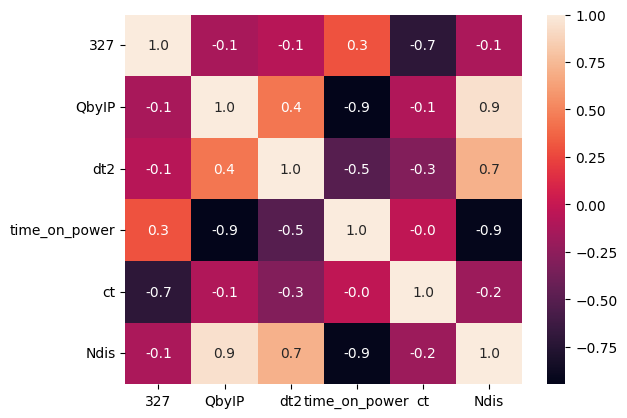

In [211]:
ctct = pd.concat(
        [
            X_raw, 
            y
        ], axis=1)
sns.heatmap(
    ctct.corr(),
    annot=True, fmt=".1f")

In [212]:
y = y.to_numpy()

# Next step is to apply some ML to prepared data

In [46]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.neural_network import MLPRegressor

In [47]:
def evaluate(model, X, y, cv):
#     print(X)
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

In [491]:
models_list = ["KNeighbors_distance", "MLP", "GBR", "SGDR"]
models = [
    KNeighborsRegressor(n_neighbors=8, weights = 'distance'),
#     GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel()), # takes too long time
    MLPRegressor(batch_size=8, hidden_layer_sizes=16, max_iter=500, random_state=42), # good grid for fit
    GradientBoostingRegressor(),
    SGDRegressor(max_iter=1000)
 ]

In [260]:
tscv = list(TimeSeriesSplit(n_splits=4).split(X, y))

In [261]:
for tr, te in tscv:
    print(tr, te)

[   0    1    2 ... 1882 1883 1884] [1885 1886 1887 ... 3767 3768 3769]
[   0    1    2 ... 3767 3768 3769] [3770 3771 3772 ... 5652 5653 5654]
[   0    1    2 ... 5652 5653 5654] [5655 5656 5657 ... 7537 7538 7539]
[   0    1    2 ... 7537 7538 7539] [7540 7541 7542 ... 9422 9423 9424]


In [230]:
from model import TrainModel

In [231]:
X.shape, y.shape

((9425, 8), (9425,))

In [232]:
tm = TrainModel(X, y)

In [492]:
tm.model_comparison(models_list, models, tscv)

Evaluating of KNeighbors_distance
Mean Absolute Error:     2.719 +/- 1.042
Root Mean Squared Error: 3.143 +/- 1.077

Evaluating of MLP
Mean Absolute Error:     0.277 +/- 0.091
Root Mean Squared Error: 0.336 +/- 0.093

Evaluating of GBR
Mean Absolute Error:     1.593 +/- 0.891
Root Mean Squared Error: 1.929 +/- 0.893

Evaluating of SGDR
Mean Absolute Error:     1.522 +/- 2.124
Root Mean Squared Error: 1.739 +/- 2.352



In [493]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=128, max_depth=4)

In [494]:
gbr_preds = []

for tr, te in tscv:
    gbr.fit(X[tr], y[tr])
    gbr_preds.append(gbr.predict(X[te]))
    print(gbr.score(X[te], y[te]))
    

0.4314261620212294
0.932162179201079
0.7016484583157049
-0.37455527249572507


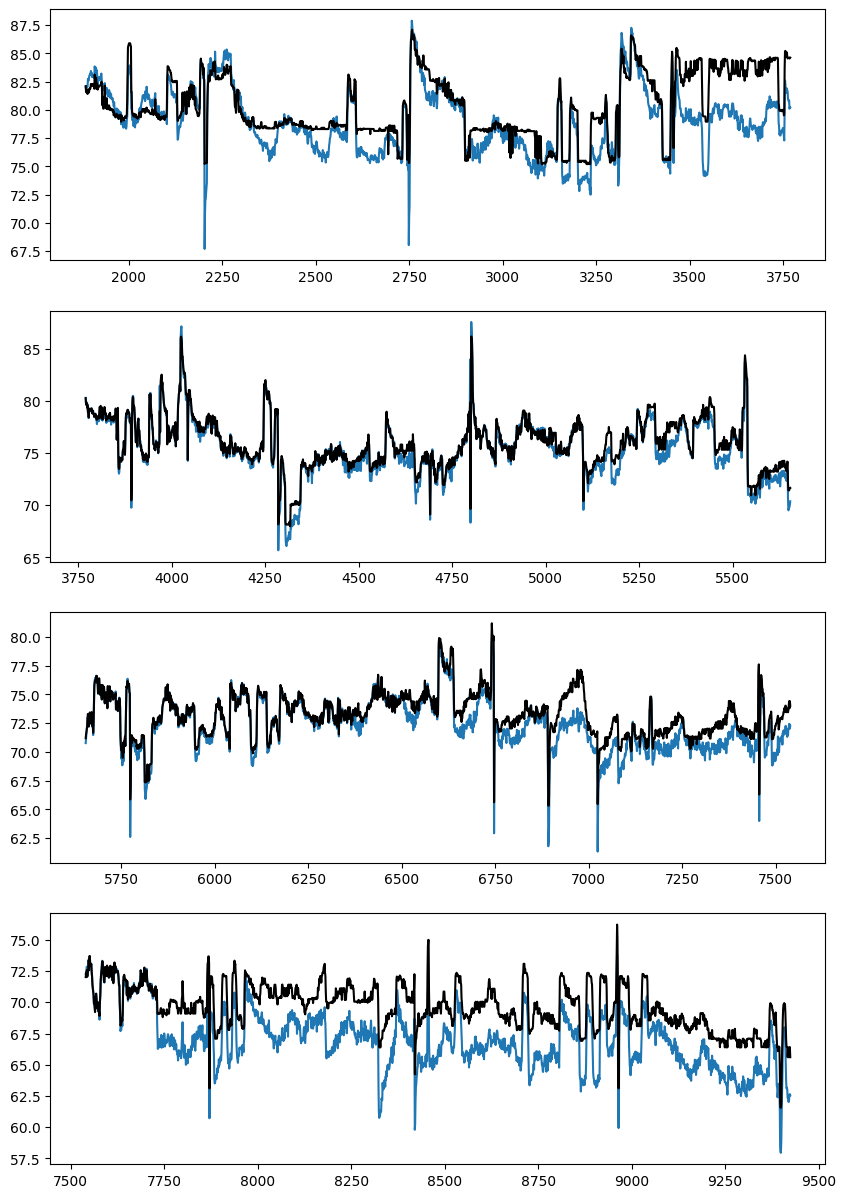

In [495]:
n = 0
fig, axs = plt.subplots(len(tscv), 1, figsize=(10,15))

for i in range(len(tscv)):

    axs[i].plot(tscv[i][1], y[tscv[i][1]])
    axs[i].plot(tscv[i][1], gbr_preds[i], color="black")

#     axs[1].plot(tscv[i][1], y[tscv[i][1]])
#     axs[1].plot(tscv[i][1], gbr_preds[i], color="black")


In [496]:
mlp = MLPRegressor(batch_size=8, hidden_layer_sizes=16, max_iter=500, random_state=42)

In [497]:
mlp_preds = []

for tr, te in tscv:
    mlp.fit(X[tr], y[tr])
    mlp_preds.append(mlp.predict(X[te]))
    print(mlp.score(X[te], y[te]))

0.9863920679826395
0.9868179041785838
0.9898570360783168
0.9604991300160548


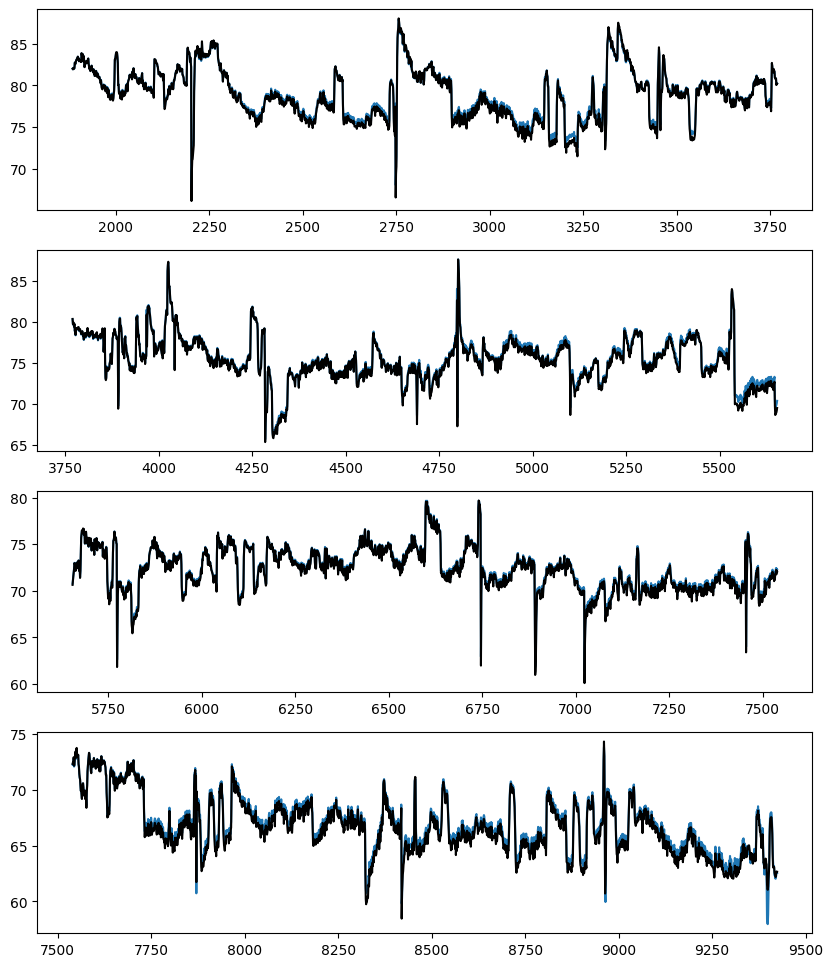

In [499]:
n = 0
fig, axs = plt.subplots(len(tscv), 1, figsize=(10,12))

for i in range(len(tscv)):

    axs[i].plot(tscv[i][1], y[tscv[i][1]])
    axs[i].plot(tscv[i][1], mlp_preds[i], color="black")

#     axs[1].plot(tscv[i][1], y[tscv[i][1]])
#     axs[1].plot(tscv[i][1], gbr_preds[i], color="black")

# There is high dispersion between to closest point on each step
# SMA teqnique is good approach to add a bit smoothness to a data

In [500]:
df_smooth = df_raw.copy()
# Timestamp can be dropped
df_smooth = df_smooth.reset_index().drop("Timestamp", axis=1)
ct_col = pd.DataFrame([])
ct_col["ct"] = df_smooth["ct"]
df_smooth = df_smooth.drop("ct", axis=1)

In [501]:
# Simple Moving Average - SMA
# We will take SMA of 10 points

st_ind, fn_ind = 0, 10
arr_smooth = np.array([])

for n in range(len(df_smooth)): # n starts from 0
    if fn_ind + n == len(df_smooth):
        break
    arr_smooth = np.append(
        arr_smooth, 
        df_smooth.iloc[st_ind + n: fn_ind + n].mean(axis=0))
    

In [502]:
arr_smooth = arr_smooth[:-10].reshape(9413,5)
arr_smooth

array([[5.77926453e+00, 1.25099212e+01, 6.08869191e+00, 9.15097032e-01,
        8.83558424e+01],
       [5.74529986e+00, 1.25121007e+01, 6.15294858e+00, 1.08147831e+00,
        8.93035960e+01],
       [5.71142106e+00, 1.25128162e+01, 6.18661327e+00, 1.24785959e+00,
        8.97977285e+01],
       ...,
       [3.19804679e+00, 9.55704333e+00, 5.75904674e+00, 1.58192011e+03,
        6.38466174e+01],
       [3.11453328e+00, 9.54566135e+00, 5.71734046e+00, 1.58208641e+03,
        6.33072046e+01],
       [3.04915317e+00, 9.53957448e+00, 5.68224971e+00, 1.58225272e+03,
        6.28786429e+01]])

In [503]:
df_sma = pd.DataFrame([])
df_sma = pd.concat(
    [
        pd.DataFrame(data=arr_smooth, columns=df_smooth.columns),
        ct_col.iloc[:-12]
    ],
    axis=1
)

In [504]:
df_sma

,327,QbyIP,dt2,time_on_power,Ndis,ct
0,5.779265,12.509921,6.088692,0.915097,88.355842,1
1,5.745300,12.512101,6.152949,1.081478,89.303596,1
2,5.711421,12.512816,6.186613,1.247860,89.797728,1
3,5.680935,12.511069,6.204116,1.414241,90.039443,1
4,5.655175,12.497902,6.210565,1.580622,90.037995,1
...,...,...,...,...,...,...
9408,3.391949,9.587176,5.844685,1581.587500,65.003867,1
9409,3.283620,9.572149,5.802724,1581.753804,64.434954,1
9410,3.198047,9.557043,5.759047,1581.920109,63.846617,1
9411,3.114533,9.545661,5.717340,1582.086413,63.307205,2


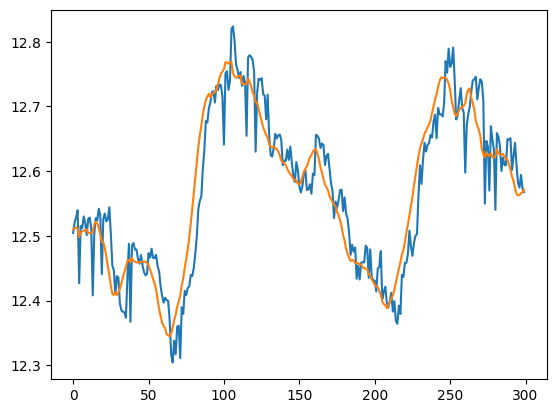

In [505]:
# comparison before / after SMA 10
plt.plot(np.arange(0,300,1), df_raw["QbyIP"][:300])
plt.plot(np.arange(0,300,1), df_sma["QbyIP"][:300])

# NOW ALL data looks much smooth
## Lets apply preprocessing and try come predictions

In [506]:
df_to_prep_sma = df_sma.copy()
y_sma = df_sma["Ndis"] #.to_numpy().reshape(-1)
X_raw_sma = df_sma.drop(["Ndis"], axis=1)
y_sma, X_raw_sma

(0       88.355842
 1       89.303596
 2       89.797728
 3       90.039443
 4       90.037995
           ...    
 9408    65.003867
 9409    64.434954
 9410    63.846617
 9411    63.307205
 9412    62.878643
 Name: Ndis, Length: 9413, dtype: float64,
            327      QbyIP       dt2  time_on_power  ct
 0     5.779265  12.509921  6.088692       0.915097   1
 1     5.745300  12.512101  6.152949       1.081478   1
 2     5.711421  12.512816  6.186613       1.247860   1
 3     5.680935  12.511069  6.204116       1.414241   1
 4     5.655175  12.497902  6.210565       1.580622   1
 ...        ...        ...       ...            ...  ..
 9408  3.391949   9.587176  5.844685    1581.587500   1
 9409  3.283620   9.572149  5.802724    1581.753804   1
 9410  3.198047   9.557043  5.759047    1581.920109   1
 9411  3.114533   9.545661  5.717340    1582.086413   2
 9412  3.049153   9.539574  5.682250    1582.252717   2
 
 [9413 rows x 5 columns])

In [507]:
X_sma = ct.transform(X_raw_sma)

In [508]:
tscv_sma = list(TimeSeriesSplit(n_splits=4).split(X_sma, y_sma))

In [509]:
tm_sma = TrainModel(X_sma, y_sma)

In [510]:
tm_sma.model_comparison(models_list, models, tscv_sma)

Evaluating of KNeighbors_distance
Mean Absolute Error:     2.807 +/- 0.996
Root Mean Squared Error: 3.227 +/- 1.003

Evaluating of MLP
Mean Absolute Error:     0.182 +/- 0.121
Root Mean Squared Error: 0.229 +/- 0.140

Evaluating of GBR
Mean Absolute Error:     1.964 +/- 1.026
Root Mean Squared Error: 2.338 +/- 0.993

Evaluating of SGDR
Mean Absolute Error:     1.710 +/- 2.447
Root Mean Squared Error: 1.954 +/- 2.723



In [511]:
gbr_preds = []

for tr, te in tscv_sma:
    gbr.fit(X_sma[tr], y_sma[tr])
    gbr_preds.append(gbr.predict(X_sma[te]))
    print(gbr.score(X_sma[te], y_sma[te]))

-0.07557435481180064
0.7617479213846118
0.45852826280559744
-1.3133832983814235


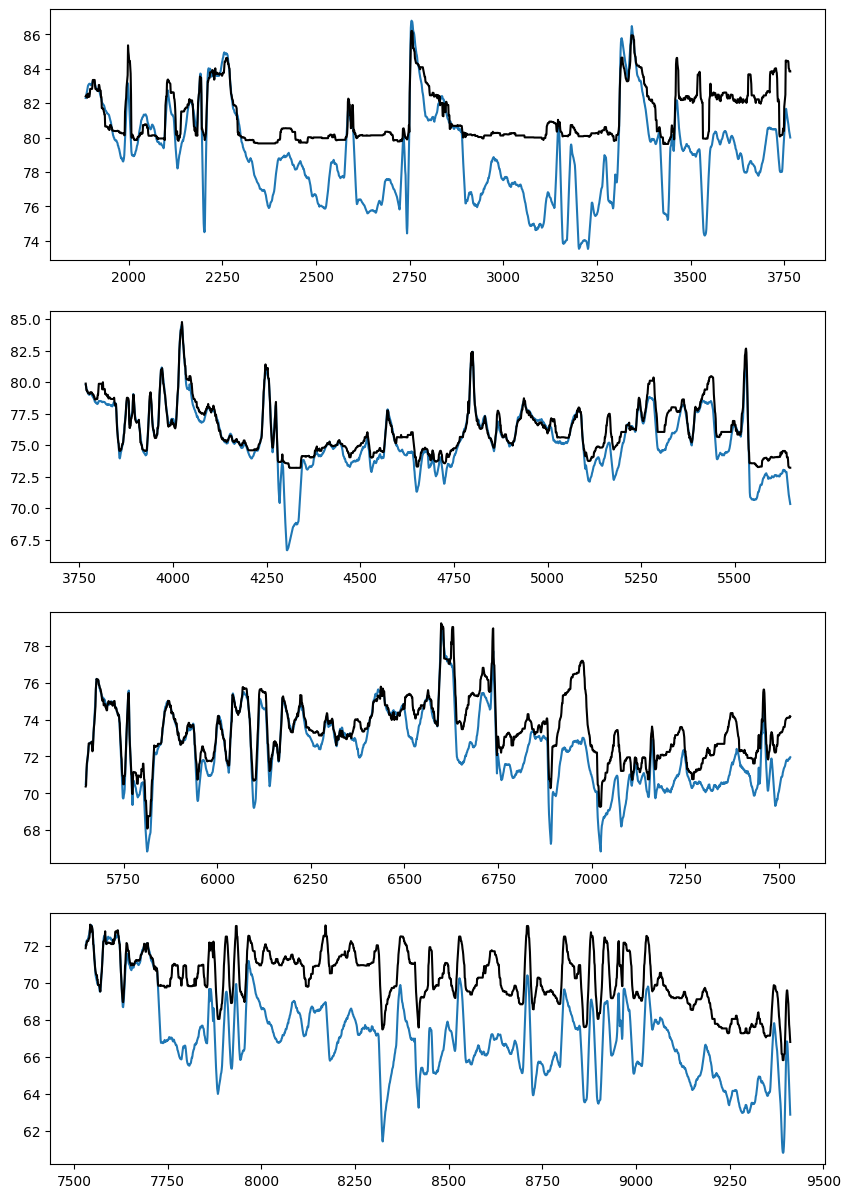

In [512]:
n = 0
fig, axs = plt.subplots(len(tscv_sma), 1, figsize=(10,15))

for i in range(len(tscv_sma)):

    axs[i].plot(tscv_sma[i][1], y_sma[tscv_sma[i][1]])
    axs[i].plot(tscv_sma[i][1], gbr_preds[i], color="black")



In [513]:
mlp = MLPRegressor(batch_size=8, hidden_layer_sizes=16, max_iter=500, random_state=42)

In [514]:
mlp_preds = []

for tr, te in tscv_sma:
    mlp.fit(X_sma[tr], y_sma[tr])
    mlp_preds.append(mlp.predict(X_sma[te]))
    print(mlp.score(X_sma[te], y_sma[te]))

0.9886832633093443
0.9960139808105
0.99933933619692
0.9638239560296034


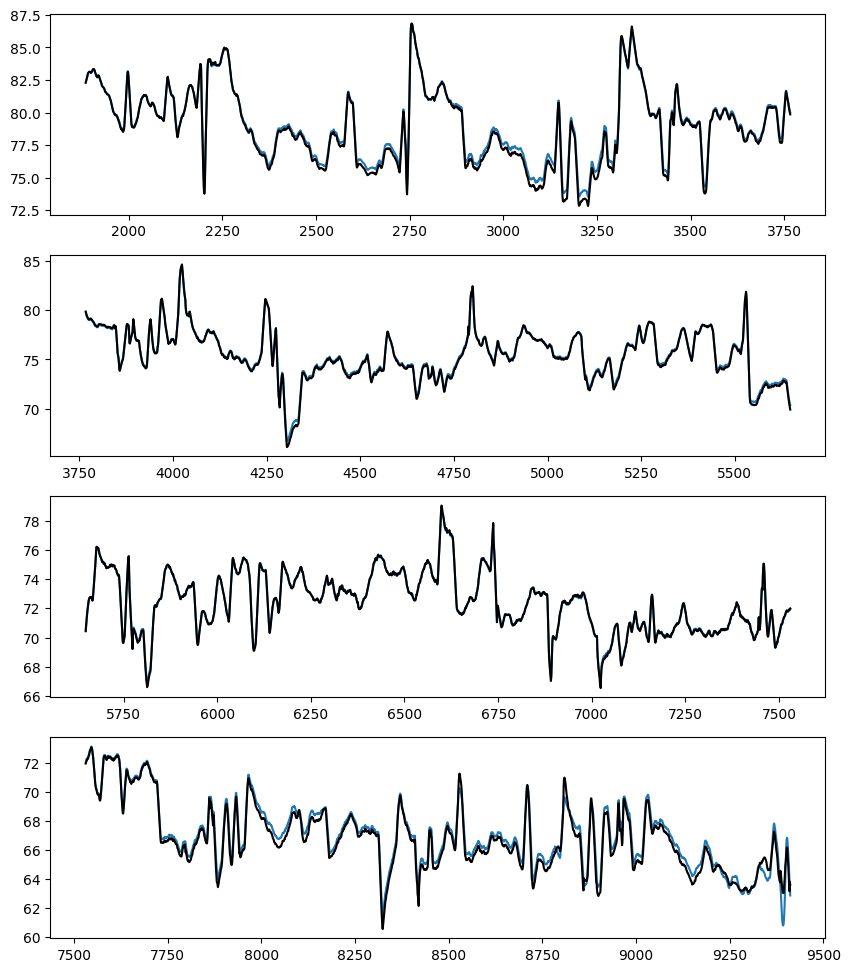

In [515]:
n = 0
fig, axs = plt.subplots(len(tscv_sma), 1, figsize=(10,12))

for i in range(len(tscv_sma)):

    axs[i].plot(tscv_sma[i][1], y_sma[tscv_sma[i][1]])
    axs[i].plot(tscv_sma[i][1], mlp_preds[i], color="black")

# 327 id - T of air is actually useless in terms of Thermal Power Predictions as well as Time Series Split cuz there are no cyclic data here

# JUST default train_test_split is below
## In this case data shuffles so no time dependensies here

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
y_tr

array([73.99968877, 75.88501226, 66.48376477, ..., 75.01947319,
       87.33255735, 70.12811735])

In [272]:
gbr2 = GradientBoostingRegressor()
gbr2.fit(X_tr, y_tr)

GradientBoostingRegressor()

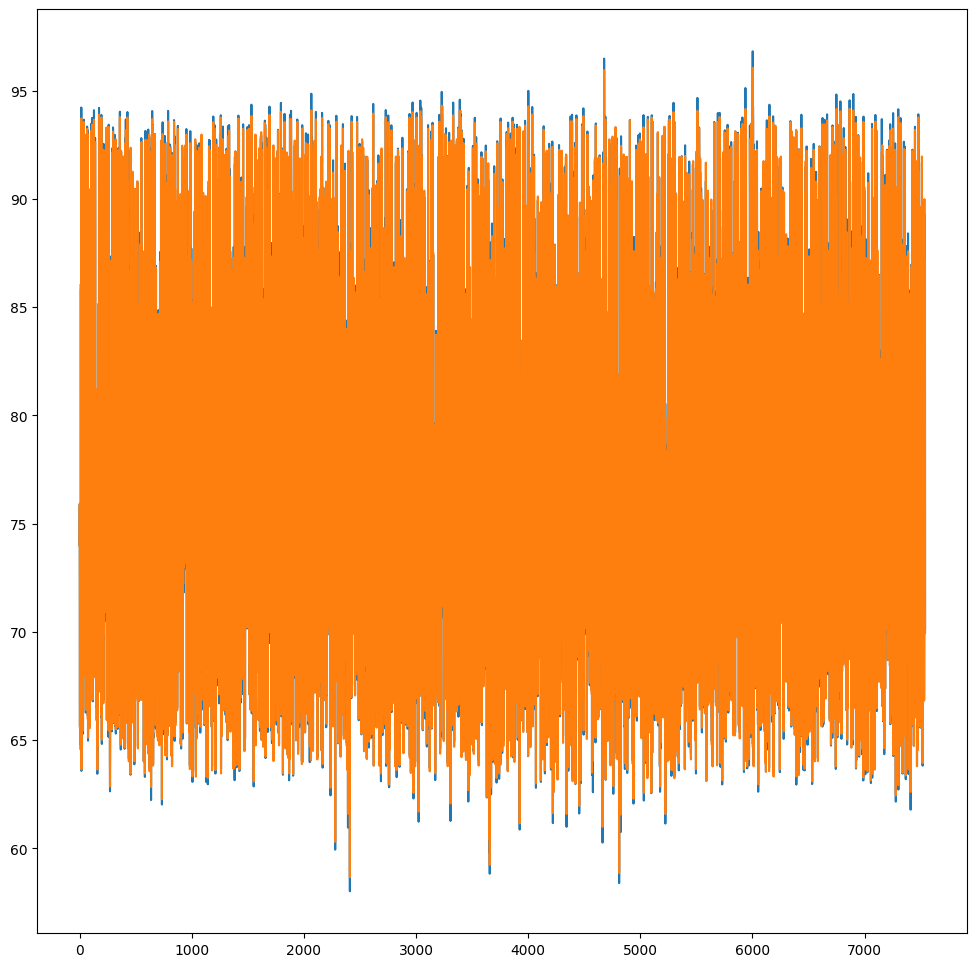

In [273]:

plt.figure(figsize=(12,12))
plt.plot(y_tr)
plt.plot(gbr2.predict(X_tr))

0.9975854008999746


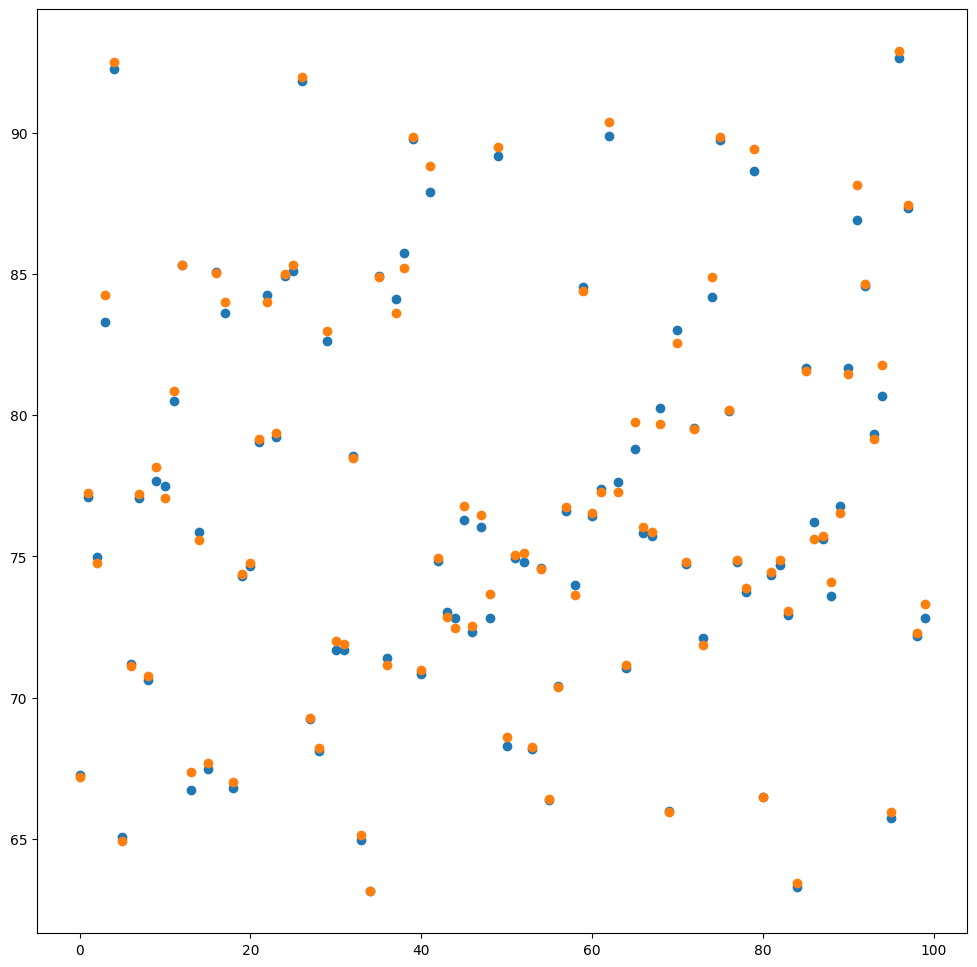

In [274]:
print(gbr2.score(X_te, y_te))
plt.figure(figsize=(12,12))
xplt = np.arange(0,len(y_te), 1)
plt.scatter(xplt[:100], y_te[:100])
plt.scatter(xplt[:100], gbr2.predict(X_te)[:100])

In [329]:
# lets do manual prediction on trained model

X_manual = pd.DataFrame(
    {
        "327": [6.13],
        "QbyIP": [9.5], 
        "dt2": [6.8], 
        "time_on_power": [1400],
        "ct": [0]
    }
)
    
X_manual

,327,QbyIP,dt2,time_on_power,ct
0,6.13,9.5,6.8,1400,0


In [300]:
X_manual = ct.transform(X_manual)

In [301]:
X_manual

array([[ 1.43155894, -1.47171351,  3.01312663,  1.32576891,  1.        ,
         0.        ,  0.        ,  0.        ]])

In [302]:
mlp.predict(X_manual)

array([75.67560408])